# Sentiment analysis FIRST MONTH
The script aims to explore the datasets

- Sentiment_first.csv ("datasets/sentiment_chatgptfirst.csv")

### TO-DO:
use negative and positive tweets. discard neutral. there are too many neutrals. 
Section for negative (frequence, frequent words, topic)
Section for positive (''')

### Sentiment_chatgptfirst analysis 

In [1]:
#load data
import pandas as pd

df = pd.read_csv('datasets/sentiment_first.csv')
df.head()

,Unnamed: 0,user_name,user_description,tweets,clean_tweets,label,date
0,357647,norman meuschke,postdoc gipplab unigoettingen phd unikonstanz ...,#ChatGPT and similar #LLM pose a challenge to ...,chatgpt similar llm pose challenge academic in...,positive,2022-12-05 17:08:20+00:00
1,357646,devang,passionate nature software developer profession,Was just wondering is there any difference bet...,wondering difference jasper chatgpt gpt chatgp...,neutral,2022-12-05 17:08:44+00:00
2,357645,gabriel furstenheim,mathematician developer amazon previously geob...,Russel vs ChatGPT. It's also funny that it tak...,russel chatgpt it funny take long time answer ...,neutral,2022-12-05 17:09:04+00:00
3,357644,iamtmoyo,blockchain enthusiast philanthropist slave jav...,"Levels🙏🙏🙏,so happy for the chatGPT team for co...",levelsso happy chatgpt team com revolutionary ...,positive,2022-12-05 17:10:31+00:00
4,357643,nenu,brain meant processing million tweet post vide...,"ChatGPT is the biggest, smartest brain 🧠 in th...",chatgpt biggest smartest brain world right now...,positive,2022-12-05 17:11:10+00:00


In [14]:
#sort tweets by date
df_sorted = df.sort_values(by='date')

In [29]:
df_sorted.date = pd.to_datetime(df_sorted.date)

In [30]:
df_sorted.date

0       2022-12-05 17:08:20+00:00
1       2022-12-05 17:08:44+00:00
2       2022-12-05 17:09:04+00:00
3       2022-12-05 17:10:31+00:00
4       2022-12-05 17:11:10+00:00
                   ...           
52332   2022-12-31 23:56:28+00:00
52333   2022-12-31 23:58:31+00:00
52334   2022-12-31 23:58:37+00:00
52335   2022-12-31 23:59:30+00:00
52336   2022-12-31 23:59:50+00:00
Name: date, Length: 52337, dtype: datetime64[ns, UTC]

In [31]:
#sort tweets by week
df_sorted['week'] = df_sorted.date.dt.week

/var/folders/vj/45n_sfss5yjgjjgf70dx93zm0000gn/T/ipykernel_5880/166556608.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_sorted['week'] = df_sorted.date.dt.week


In [34]:
week1 = df_sorted[df_sorted.week == 49]

In [36]:
week2 = df_sorted[df_sorted.week == 50]

In [37]:
week3 = df_sorted[df_sorted.week == 51]

In [38]:
week4 = df_sorted[df_sorted.week == 52]

In [3]:
sentiments = df.label

In [4]:
sentiments.value_counts()

neutral     23805
positive    18551
negative     9981
Name: label, dtype: int64

In [11]:
# save all the negativ values in a list and count them

negatives = df[df.label == 'negative']
positives = df[df.label == 'positive']
neutrals = df[df.label == 'neutral']

print("negatives: " ,len(neutrals))
print("positives: ", len(positives))
print("neutrales: ", len(negatives))



negatives:  23805
positives:  18551
neutrales:  9981


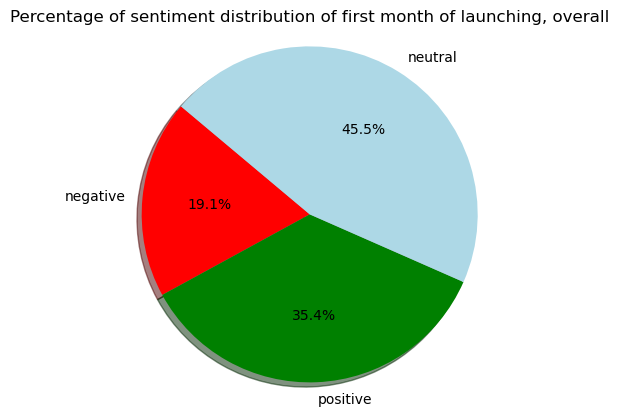

In [18]:
#plot the proportion of sentiments
import matplotlib.pyplot as plt 

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['red', 'green', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution of first month of launching, overall')
plt.show()

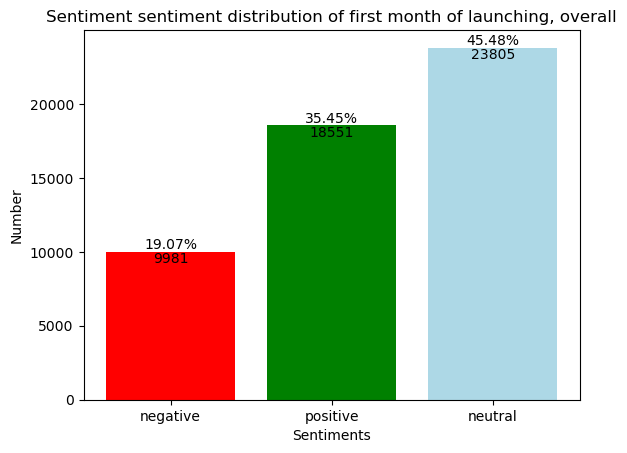

In [19]:
# histogram
import matplotlib.pyplot as plt

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['red', 'green', 'lightblue']

plt.bar(labels, sizes, color=colors)
#add the percentage of each sentiment in the bars
for i in range(len(sizes)):
    plt.text(i, sizes[i], str(round((sizes[i]/len(sentiments))*100, 2)) + '%', ha='center', va='bottom')  
    plt.text(i, sizes[i], str(sizes[i]), ha='center', va='top')  
    
plt.xlabel('Sentiments')
plt.ylabel('Number')
plt.title('Sentiment sentiment distribution of first month of launching, overall')
plt.show()


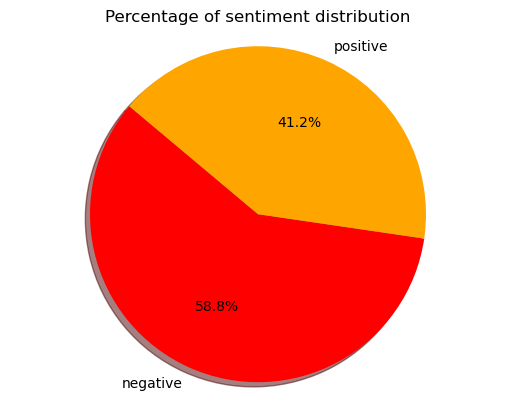

In [159]:
#Considering only positive and negative sentiments
labels = ['negative', 'positive']
sizes = [len(negatives), len(positives)]
colors = ['red', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution')
plt.show()

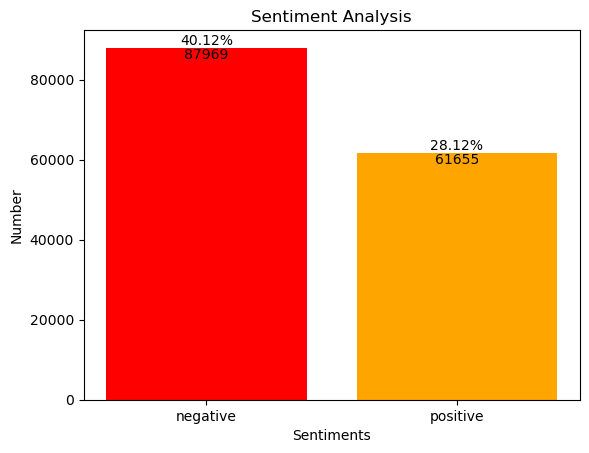

In [160]:
# histogram
import matplotlib.pyplot as plt

labels = ['negative', 'positive']
sizes = [len(negatives), len(positives)]
colors = ['red', 'orange']

plt.bar(labels, sizes, color=colors)
#add the percentage of each sentiment in the bars
for i in range(len(sizes)):
    plt.text(i, sizes[i], str(round((sizes[i]/len(sentiments))*100, 2)) + '%', ha='center', va='bottom')  
    plt.text(i, sizes[i], str(sizes[i]), ha='center', va='top')  
    
plt.xlabel('Sentiments')
plt.ylabel('Number')
plt.title('Sentiment Analysis')
plt.show()


## Analysis per week

In [41]:
week1.label.value_counts()

neutral     11609
positive     9858
negative     5456
Name: label, dtype: int64

In [57]:
week2.label.value_counts()


neutral     2346
positive    1894
negative    1059
Name: label, dtype: int64

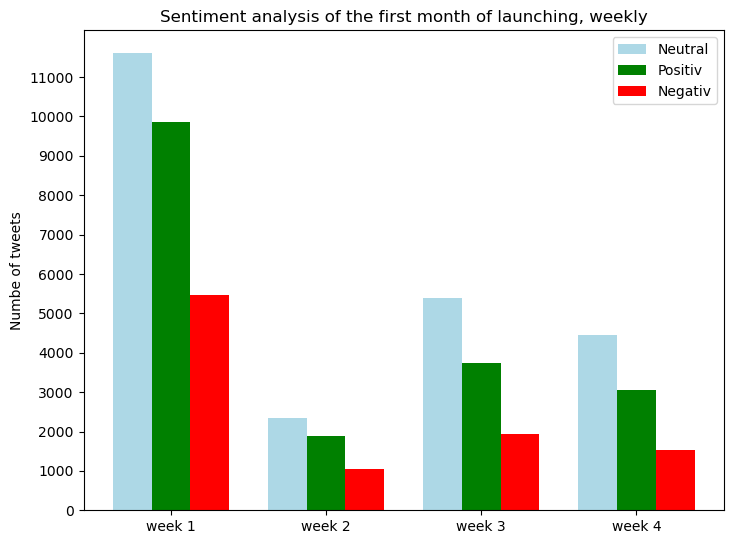

In [61]:
import numpy as np
import matplotlib.pyplot as plt

data = [[11609, 2346, 5397, 4453  ], #neutral
[9858, 1894, 3737, 3062], #positiv
[5456, 1059, 1933,1533]] #negativ
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = 'lightblue', width = 0.25)
ax.bar(X , data[1], color = 'green', width = 0.25)
ax.bar(X + 0.25, data[2], color = 'red', width = 0.25)
ax.set_ylabel('Numbe of tweets')
ax.set_title('Sentiment analysis of the first month of launching, weekly')
ax.set_xticks(X, ('week 1', 'week 2', 'week 3', 'week 4'))
ax.set_yticks(np.arange(0, 11609, 1000))
ax.legend(labels=['Neutral', 'Positiv', 'Negativ'])
plt.show()


# Word frequecy analysis

In [65]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet_positiv = [tweet.lower().split() for tweet in positives.clean_tweets]
words_in_tweet_negativ = [tweet.lower().split() for tweet in negatives.clean_tweets]

print(words_in_tweet_positiv[:2])
print(words_in_tweet_negativ[:2])

[['chatgpt', 'similar', 'llm', 'pose', 'challenge', 'academic', 'integrity', 'jan', 'wahle', 'explains', 'current', 'research', 'presented', 'emnlp', 'later', 'week', 'make', 'optimistic', 'challenge', 'met'], ['levelsso', 'happy', 'chatgpt', 'team', 'com', 'revolutionary', 'ideathe', 'future', 'look', 'bright', 'chatgpt']]
[['tomorrowsmps', 'agree', 'starmers', 'decision', 'axe', 'corbyn', 'labour', 'candidate', 'history', 'tolerance', 'antisemitism', 'concerning', 'place', 'party', 'chatgpt'], ['tomorrowsmps', 'keir', 'starmers', 'decision', 'axe', 'jeremy', 'corbyn', 'labour', 'candidate', 'show', 'touch', 'party', 'disaster', 'labour', 'divide', 'further', 'labour', 'chatgpt']]


In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

# List of all words across tweets
pos_all_words = list(itertools.chain(*words_in_tweet_positiv))
neg_all_words = list(itertools.chain(*words_in_tweet_negativ))

# Create counter
pos_counts = collections.Counter(pos_all_words)
neg_counts = collections.Counter(neg_all_words)

print(pos_counts.most_common(20))
print(neg_counts.most_common(20))

[('chatgpt', 21926), ('openai', 3536), ('like', 1632), ('it', 1531), ('new', 1374), ('good', 1372), ('time', 1113), ('asked', 1096), ('use', 1087), ('write', 1075), ('tool', 1051), ('gpt', 1020), ('question', 943), ('answer', 938), ('great', 919), ('way', 897), ('google', 887), ('amazing', 864), ('thing', 836), ('future', 829)]
[('chatgpt', 11426), ('openai', 1441), ('like', 1006), ('google', 829), ('it', 768), ('answer', 698), ('people', 607), ('write', 579), ('asked', 563), ('think', 563), ('know', 522), ('time', 517), ('question', 508), ('human', 488), ('thing', 457), ('use', 432), ('dont', 419), ('wrong', 415), ('gpt', 380), ('need', 367)]


In [67]:
pos_clean_tweets = pd.DataFrame(pos_counts.most_common(15),
                             columns=['words', 'count'])
neg_clean_tweets = pd.DataFrame(neg_counts.most_common(15),
                             columns=['words', 'count'])

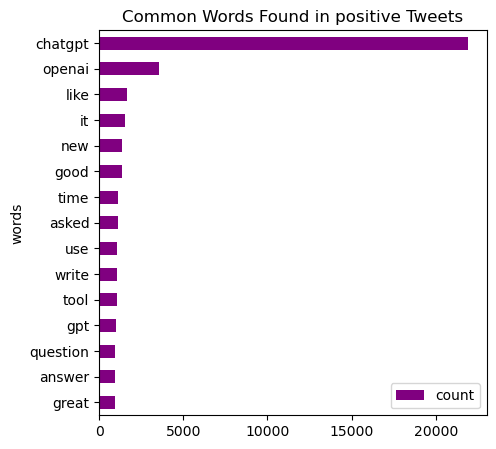

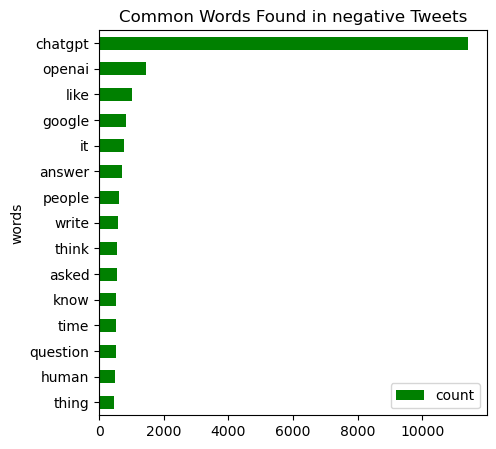

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
pos_clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in positive Tweets")

plt.show()

fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
neg_clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in negative Tweets")

plt.show()

### WordCloud

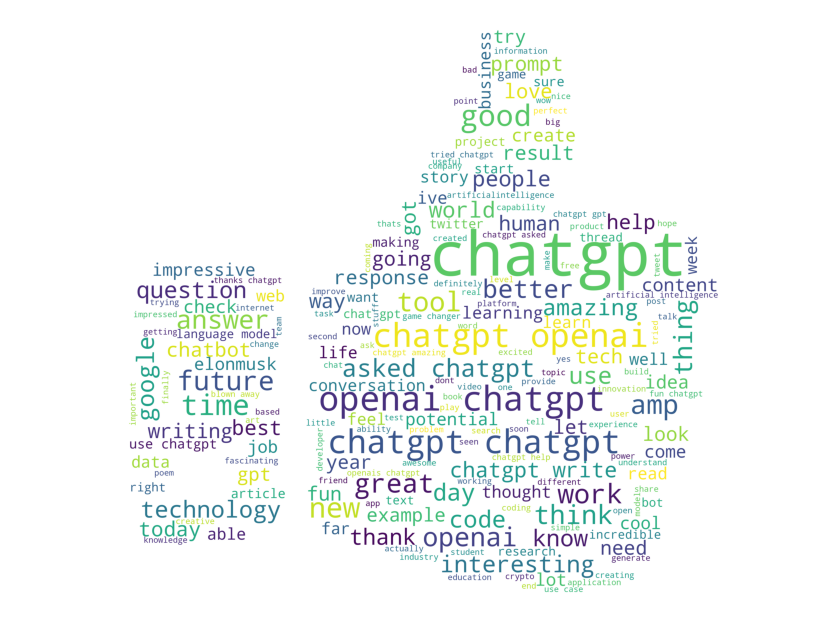

In [70]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)

p = ", ".join(pos_all_words)

mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/upvote.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, mask=mask).generate(p)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

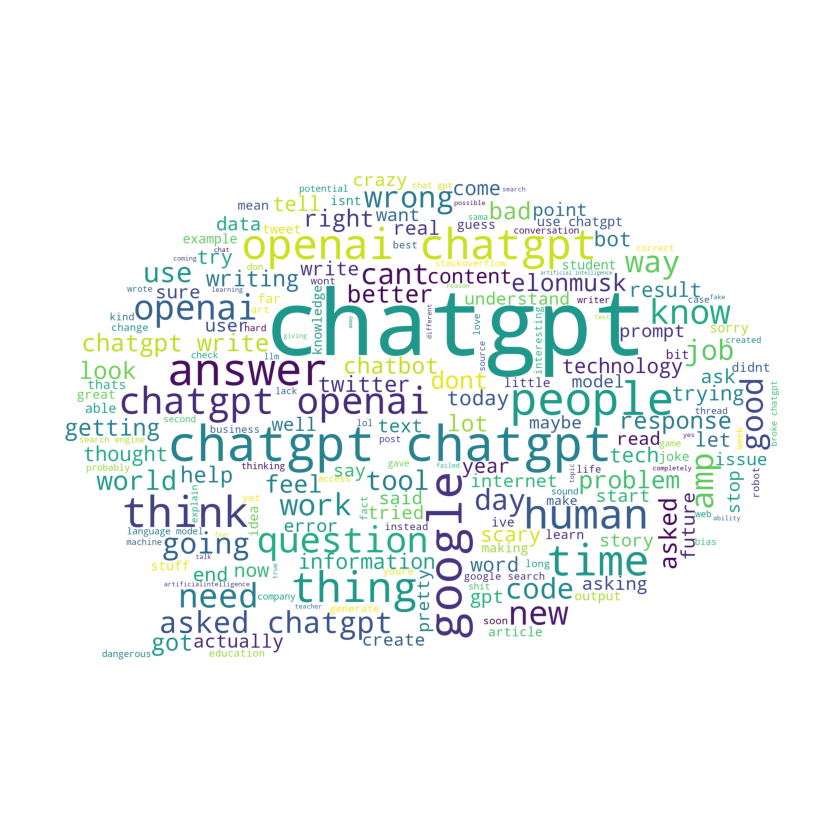

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)

n = ", ".join(neg_all_words)
 
mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/comment.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(n)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()